# Wine-Quality Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read data

In [2]:
file_path = 'data/winequalityN.csv'
data = pd.read_csv(file_path)

### Basic infromation about data

In [3]:
# First data rows
print("\nFirst data rows:")
print(data.head())


First data rows:
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5     

In [4]:
# Basic information about data
print("Number of rows and columns:", data.shape)
print("\nBasic information about data:")
print(data.info())

Number of rows and columns: (6497, 13)

Basic information about data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660

In [9]:
# Suming nulls in every column

empty = data.isnull().sum()
percent_empty = (data.isnull().sum() / len(data)) * 100

print(empty)
print("\nPercent part of null in every column \n")
print(percent_empty)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Percent part of null in every column 

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64


In [14]:
# delete entries with at least one null
cleared_data = data.dropna()
print("After: ")
print(cleared_data.info())
print("\n Check (IF True there is no nulls in that collumn\n")
print(cleared_data.notnull().all())

After: 
<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB
None

 Check 

type                    True
fixed acidity   

In [11]:
# Descriptive statistics
# count - The number of not-empty values.
# mean - The average (mean) value.
# std - The standard deviation.
# min - the minimum value.
# 25% - The 25% percentile.
# 50% - The 50% percentile.
# 75% - The 75% percentile.
# max - the maximum value.

# Percentile - how many of the values are less than the given percentile. 
print("\nDescriptive statistics:")
print(data.describe())


Descriptive statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000     

## 2. Data visualization

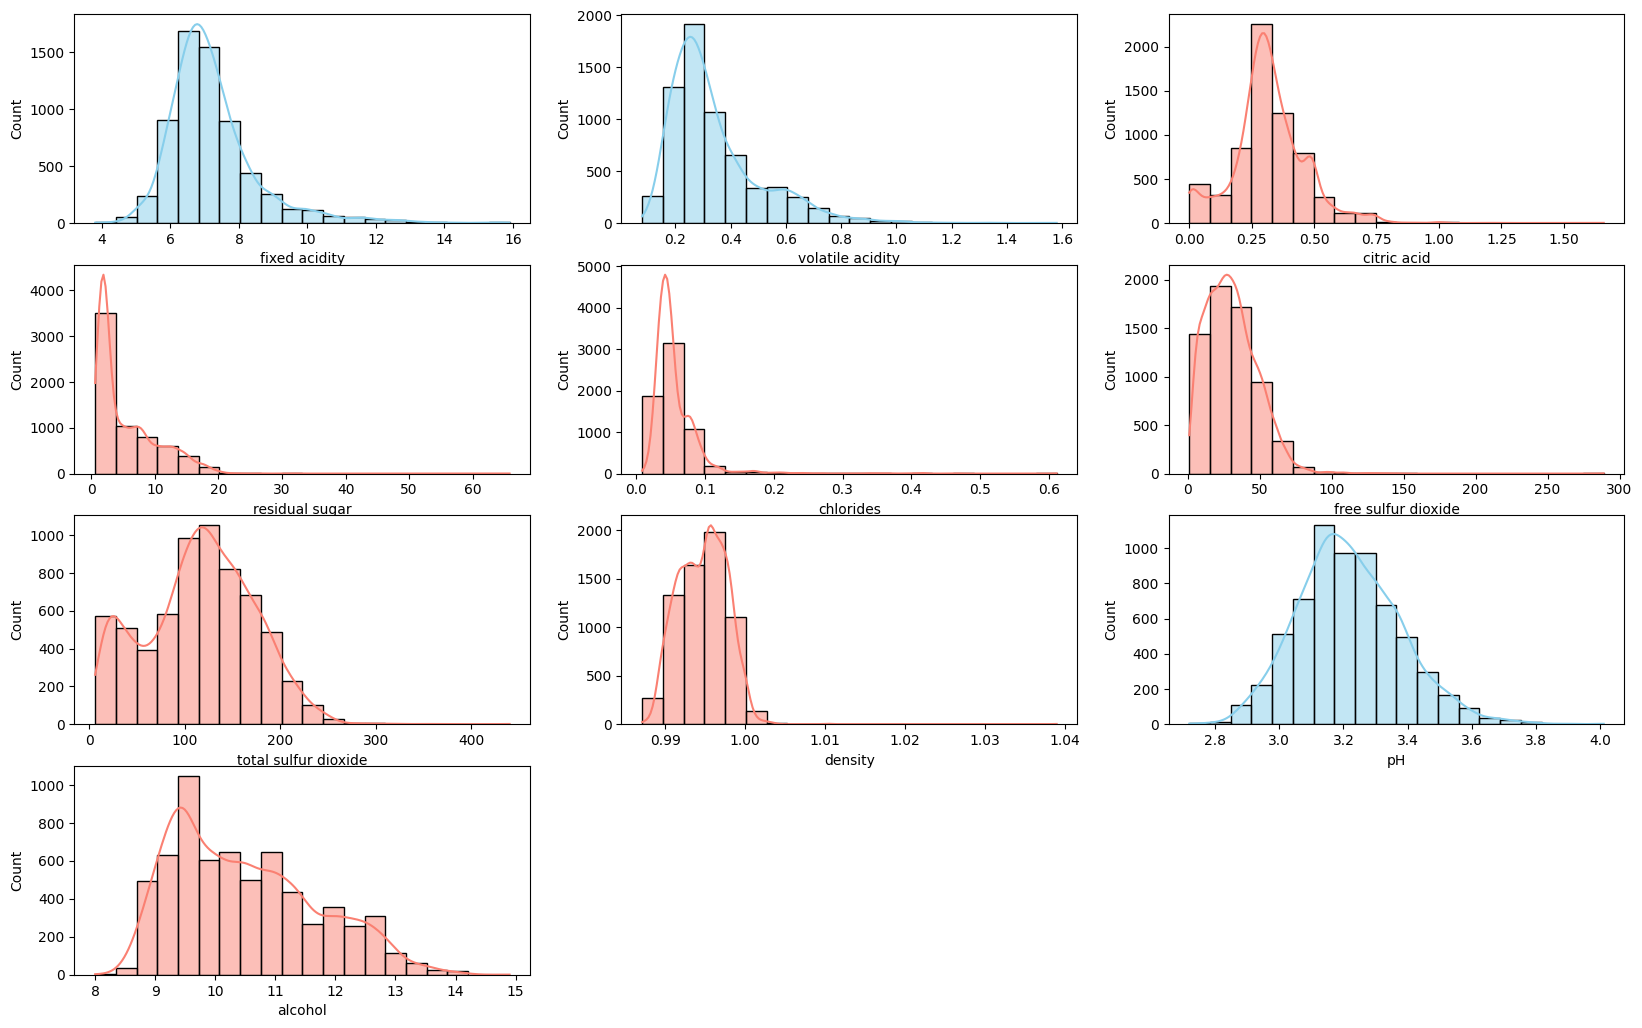

In [17]:
# Histographs
plt.figure(figsize=(20, 32))
plt.subplot(10, 3, 1)
sns.histplot(cleared_data['fixed acidity'], bins=20, kde=True, color='skyblue')
# plt.title('Fixed acidity distribution')

plt.subplot(10, 3, 2)
sns.histplot(cleared_data['volatile acidity'], bins=20, kde=True, color='skyblue')
# plt.title('Volatile acidity distribution')

plt.subplot(10, 3, 3)
sns.histplot(cleared_data['citric acid'], bins=20, kde=True, color='salmon')
# plt.title('Citric acid distribution')

plt.subplot(10, 3, 4)
sns.histplot(cleared_data['residual sugar'], bins=20, kde=True, color='salmon')
# plt.title('Residual sugar distribution')

plt.subplot(10, 3, 5)
sns.histplot(cleared_data['chlorides'], bins=20, kde=True, color='salmon')
# plt.title('Chlorides distribution')

plt.subplot(10, 3, 6)
sns.histplot(cleared_data['free sulfur dioxide'], bins=20, kde=True, color='salmon')
# plt.title('Free sulfur dioxide distribution')

plt.subplot(10, 3, 7)
sns.histplot(cleared_data['total sulfur dioxide'], bins=20, kde=True, color='salmon')
# plt.title('Total sulfur dioxide distribution')

plt.subplot(10, 3, 8)
sns.histplot(cleared_data['density'], bins=20, kde=True, color='salmon')
# plt.title('Density distribution')

plt.subplot(10, 3, 9)
sns.histplot(cleared_data['pH'], bins=20, kde=True, color='skyblue')
# plt.title('pH distribution')

plt.subplot(10, 3, 10)
sns.histplot(cleared_data['alcohol'], bins=20, kde=True, color='salmon')
# plt.title('Alcohol distribution')


plt.show()

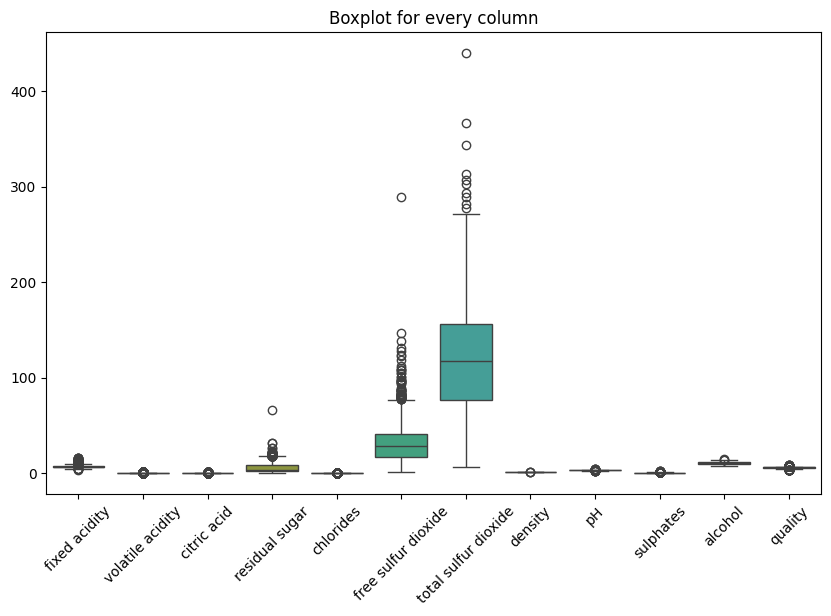

In [19]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleared_data)
plt.xticks(rotation=45) 
plt.title('Boxplot for every column')
plt.show()

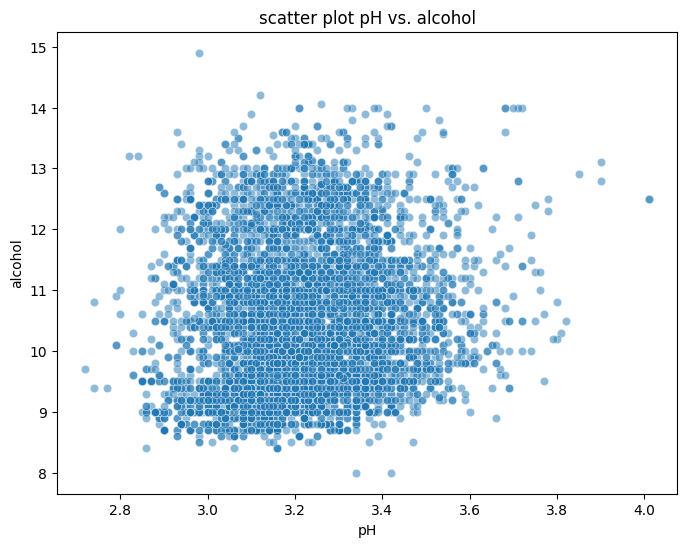

In [20]:
#scatter plot 'pH' vs. 'alcohol')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pH', y='alcohol', data=data, alpha=0.5)
plt.title('scatter plot pH vs. alcohol')
plt.xlabel('pH')
plt.ylabel('alcohol')
plt.show()